In [32]:
from anytree import Node, RenderTree
import json

# Sample Kraken2 output as a string (for demonstration)
kraken2_output = """
100.00	6387865	0	R	1	root
99.91	6382175	0	R1	131567	  cellular organisms
93.67	5983221	0	D	2	    Bacteria
51.64	3298620	0	D1	1783272	      Terrabacteria group
48.33	3087203	0	P	1239	        Bacillota
45.99	2938039	0	C	186801	          Clostridia
45.97	2936648	0	O	186802	            Eubacteriales
28.46	1817752	0	F	186803	              Lachnospiraceae
14.90	951628	0	G	841	                Roseburia
13.91	888569	888569	S	166486	                  Roseburia intestinalis
0.53	33734	33734	S	301301	                  Roseburia hominis
0.46	29324	29324	S	2763062	                  Roseburia rectibacter
3.63	231724	0	G	1766253	                Agathobacter
3.63	231724	231724	S	39491	                  Agathobacter rectalis
3.09	197657	0	G	572511	                Blautia
1.46	93563	0	G1	2648079	                  unclassified Blautia
0.15	9677	9677	S	2479767	                    Blautia sp. SC05B48
1.31	83885	83885	S	2860051	                    Blautia sp. KLE_1732_HM_1032
0.93	59325	59325	S	418240	                  Blautia wexlerae
0.38	24213	24213	S	40520	                  Blautia obeum
0.22	13876	13876	S	89014	                  Blautia luti
0.02	1337	1337	S	1912897	                  Blautia argi
0.02	988	988	S	53443	                  Blautia hydrogenotrophica
0.01	814	814	S	1796616	                  Blautia pseudococcoides
0.02	1009	1009	S	1322	                  Blautia hansenii
0.01	854	854	S	33035	                  Blautia producta
0.01	749	749	S	2877527	                  Blautia parvula
"""

def parse_kraken_output(output):
    lines = output.strip().split('\n')
    root = Node("root")  # Create a root node for the tree
    current_nodes = {0: root}  # Keep track of nodes by their hierarchy level

    for line in lines:
        parts = line.split('\t')
        if len(parts) < 5:
            continue  # Skip invalid lines

        # Determine the number of leading spaces to find the hierarchy level
        leading_spaces = len(parts[5]) - len(parts[5].strip())
        level = leading_spaces // 2  # Assuming each indentation level is 2 spaces
        
        
        # Create a new node
        taxon = parts[5].strip()  # Taxon name
        new_node = Node(taxon, parent=current_nodes[level])  # Set the parent to the last node at this level

        # Update the current_nodes dictionary to include the new node
        current_nodes[level + 1] = new_node  # Add new node as a child for the next level

    return root

def print_tree(node):
    for pre, _, node in RenderTree(node):
        print(f"{pre}{node.name}")

# Parse the Kraken2 output and create the tree
phylogenetic_tree = parse_kraken_output(kraken2_output)

# Print the tree structure
print_tree(phylogenetic_tree)

# Optionally, convert the tree to a JSON format if needed
def tree_to_json(node):
    return {
        "name": node.name,
        "children": [tree_to_json(child) for child in node.children]
    }



root
└── root
    └── cellular organisms
        └── Bacteria
            └── Terrabacteria group
                └── Bacillota
                    └── Clostridia
                        └── Eubacteriales
                            └── Lachnospiraceae
                                ├── Roseburia
                                │   ├── Roseburia intestinalis
                                │   ├── Roseburia hominis
                                │   └── Roseburia rectibacter
                                ├── Agathobacter
                                │   └── Agathobacter rectalis
                                └── Blautia
                                    ├── unclassified Blautia
                                    │   ├── Blautia sp. SC05B48
                                    │   └── Blautia sp. KLE_1732_HM_1032
                                    ├── Blautia wexlerae
                                    ├── Blautia obeum
                                    ├── Blautia luti
 

In [35]:
%pip install anytree graphviz matplotlib pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


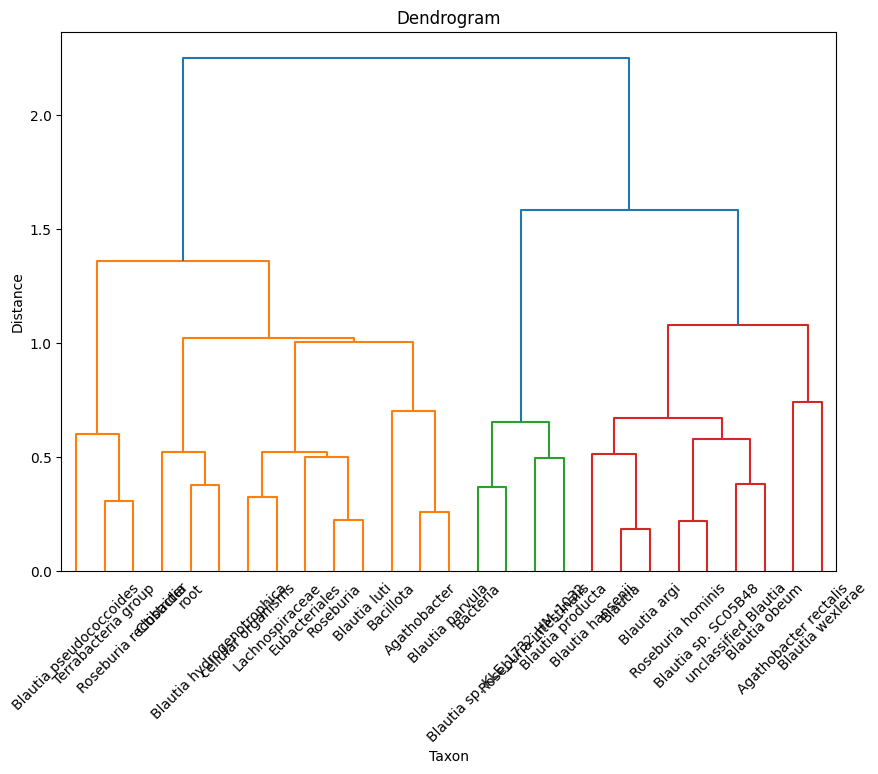

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Function to parse Kraken2 output and extract relevant data
def parse_kraken_output_to_matrix(output):
    lines = output.strip().split('\n')
    taxa = []
    for line in lines:
        parts = line.split('\t')
        if len(parts) < 5:
            continue  # Skip invalid lines
        taxon = parts[5].strip()  # Taxon name
        taxa.append(taxon)
    
    # Create a random distance matrix for demonstration purposes
    # In practice, you should calculate the actual distances between taxa
    np.random.seed(0)
    data = np.random.rand(len(taxa), 4)  # Replace this with your actual data
    
    return taxa, data

# Parse the Kraken2 output
taxa, data = parse_kraken_output_to_matrix(kraken2_output)

# Perform hierarchical/agglomerative clustering
Z = linkage(data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=taxa)
plt.title('Dendrogram')
plt.xlabel('Taxon')
plt.ylabel('Distance')
plt.show()